In [1]:
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import ensemble
from  sklearn import linear_model

import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('white')
sns.set(rc={'figure.figsize':(12,7)})

In [2]:
df=pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
#Removing null values
df.dropna(inplace=True, axis=0)

In [5]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [6]:
# Dropping unnecessary columns
df.drop(['Address', 'SellerG', 'Date'], inplace=True, axis=1)

This is a regression problem where we are trying to predict House prices based on various features.We also want to know some explanotory power of these features in determining the value of the houses.  Some algorithms that do well in predicting here are Random Forest Regression, Gradient Boost regression etc..

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 18 columns):
Suburb           8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(5)
memory usage: 1.3+ MB


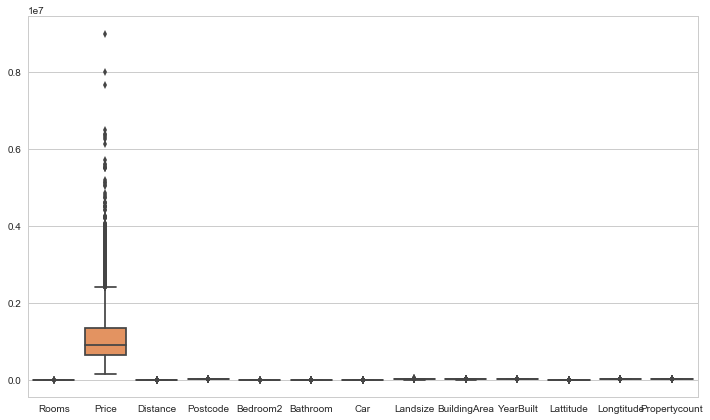

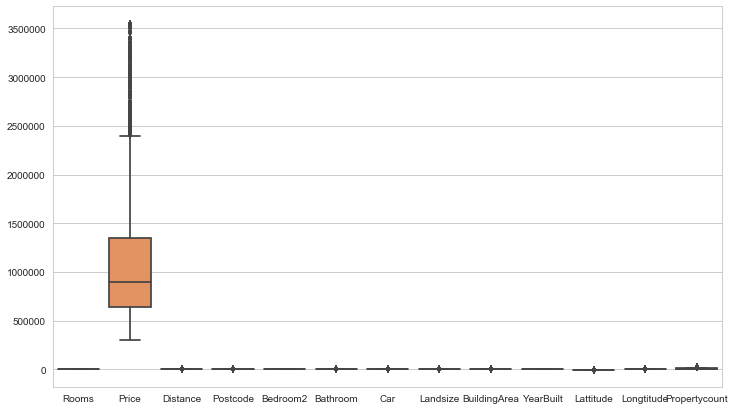

In [8]:
# Winsorising the outliers
# Box plot before winsorizing
sns.set_style("whitegrid")
g=sns.boxplot(data=df)
plt.show()

for columns in df:
    stats.mstats.winsorize(df[columns], inplace=True, limits = [0.01, 0.01])

# Box plot after winsorizing

sns.set_style("whitegrid")
g=sns.boxplot(data=df)
plt.show()

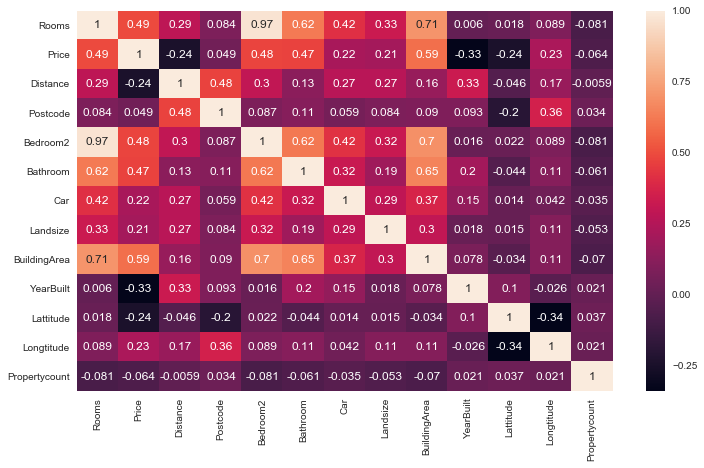

In [9]:
# Heat map
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(df.corr(), annot=True)
plt.show()

From this correlation matrix we can see that number of bedrooms, bathrooms, building area, number of total rooms have a positive correlation and add value to the house price.

We need to confirm this with 'feature selection method'. 'recursive feature elimination method' which acutally runs the model and sees which features have great explanatory power for the variance in the price.

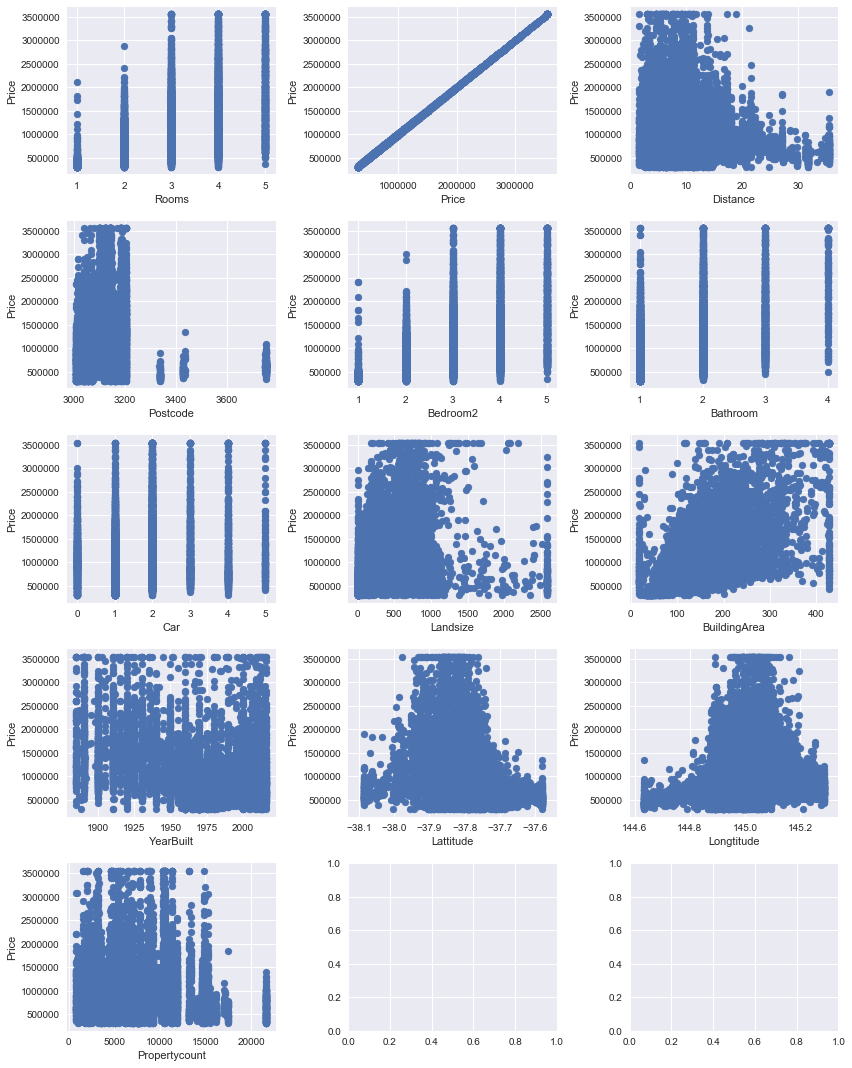

In [10]:
# Scatter plot to see the spread of the X variables in relation to outcome variable Y
num_datatype=df.select_dtypes(include=["number"])
x=y=0
fig, axes =plt.subplots(5,3)
fig.set_size_inches(12, 15)
for i in range(0, num_datatype.shape[1]):  
    axes[x,y].scatter(num_datatype.iloc[:, i], num_datatype['Price'])
    axes[x,y].set(xlabel=num_datatype.columns[i], ylabel='Price')
    plt.tight_layout()
    y+=1
    if (y==3):
        x+=1
        y=0
plt.show()

In [11]:
#Coverting the latitute and longitude into non-negative numbers
num_datatype['Lattitude']=abs(num_datatype['Lattitude'])
num_datatype['Longtitude']=abs(num_datatype['Longtitude'])

/Users/Sri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Sri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
Y=df['Price']
X=num_datatype.loc[:, ~(num_datatype.columns).isin(['Price'])]

In [13]:
#### Using SelectKBest selector to select valued features

In [14]:
Y=df['Price']
#X=num_datatype.loc[:, ~(num_datatype.columns).isin(['Price'])]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores and select the best 4 columns or features
np.set_printoptions(precision=3)
dic=dict()
for i, name in enumerate(X.columns):
    dic[name]=fit.scores_[i]
cols_selected=sorted(dic, key=dic.__getitem__, reverse=True)
print ('The most important columns are', cols_selected[0:4])

The most important columns are ['Propertycount', 'Landsize', 'BuildingArea', 'Distance']


In [15]:
#### Using Recurssive Feature Elimination

In [16]:
regr=linear_model.Lasso(alpha=0.001).fit(X,Y)
rfe = RFE(regr, 4)
fit = rfe.fit(X, Y)

dic=dict()
for i, name in enumerate(X.columns):
    dic[name]=fit.ranking_[i]
cols_selected=sorted(dic, key=dic.__getitem__)
print ('The most important columns are', cols_selected[0:4])

The most important columns are ['Rooms', 'Bathroom', 'Lattitude', 'Longtitude']


In [17]:
# Scaling the data
num_names=df.select_dtypes(include=['number']).columns
df_scaled=pd.DataFrame(preprocessing.scale(df[num_names]), columns=num_names)
# To save the column names for creating the categorical variables from objects datatype
object_names=df.select_dtypes(include=['object']).columns
for name in object_names:
    df_scaled[name]= pd.Series(df[name].values.tolist())
df=df_scaled

In [18]:
# Creating Dummy variables for Categorical variables
df_cat=pd.get_dummies(df[object_names])
df.drop(df.select_dtypes(include=['object']), inplace=True, axis=1)
for column in df_cat.columns:
    df[column]= pd.Series(df_cat[column].values.tolist())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Columns: 373 entries, Rooms to Regionname_Western Metropolitan
dtypes: float64(13), int64(360)
memory usage: 25.3 MB


In [19]:
Y=df['Price']
X=df.loc[:, ~(df.columns).isin(['Price'])]

In [20]:
def model(mod,X, Y):
    #Data split to Train and test
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
    model_object=mod
    model_object.fit(X_train, y_train)
    evaluation_continuous(model_object)
    return model_object

def evaluation_continuous(model_object):
    #Evalution of model
    score=cross_val_score(X=X_test, y=y_test, estimator=model_object, cv=10)
    print("\nAccuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    
    # Calculate the error, also called the residual.
    
    actual=y_test
    predicted=model_object.predict(X_test)
    residual = actual - predicted
    print ('\nThe Root Mean Squared Error is %0.2f'%np.sqrt(mean_squared_error(actual, predicted)))
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    return

### Random Forest Regression

/Users/Sri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Accuracy: 0.81 (+/- 0.06)

The Root Mean Squared Error is 0.42


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

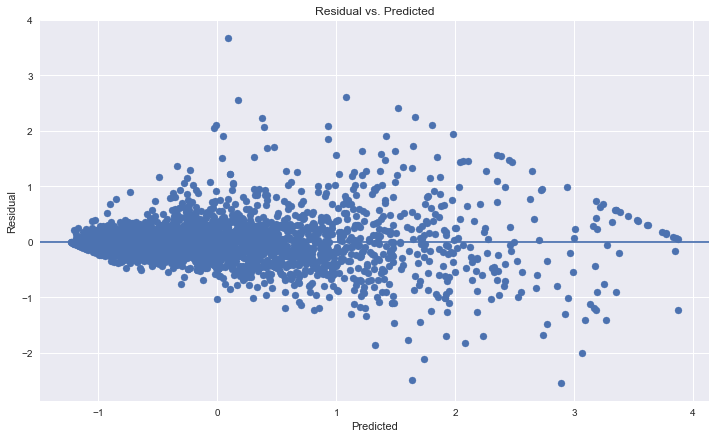

In [21]:
model(ensemble.RandomForestRegressor(), X, Y)

The residual plot appears to do well expect that very high/low values are not predicted very well with this model.

### Ridge Regression


Accuracy: 0.76 (+/- 0.06)

The Root Mean Squared Error is 0.47


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

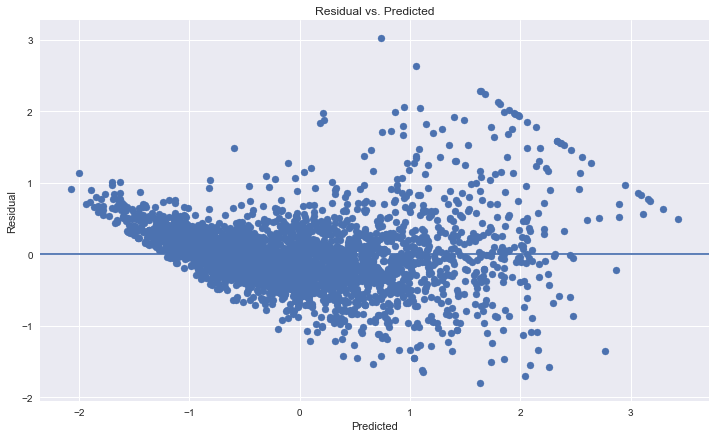

In [22]:
model(linear_model.Ridge(), X, Y)


### Lasso Regression


Accuracy: 0.75 (+/- 0.07)

The Root Mean Squared Error is 0.49


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

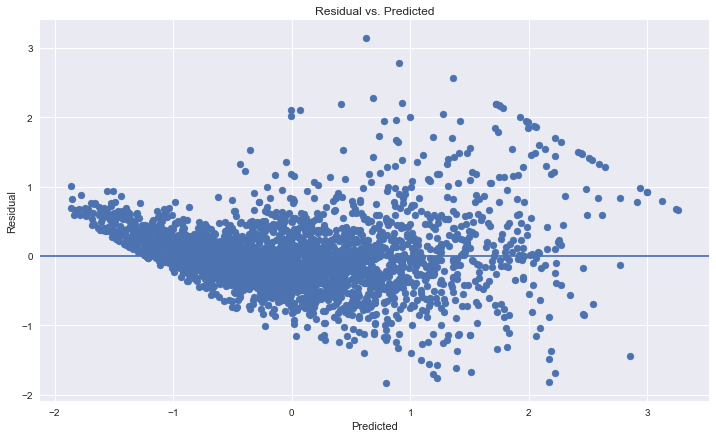

In [23]:
model(linear_model.Lasso(alpha=0.001), X, Y)

### Gradient Boost Regression


Accuracy: 0.84 (+/- 0.05)

The Root Mean Squared Error is 0.40


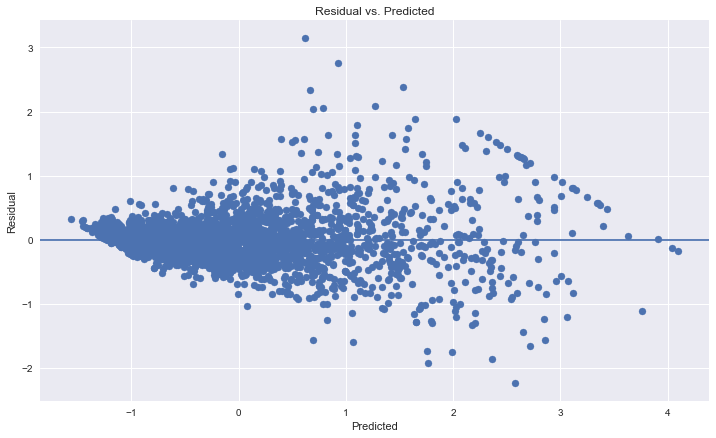

In [24]:
params = {'n_estimators': 500,
          'max_depth': 2}
model(ensemble.GradientBoostingRegressor(**params), X, Y)
plt.show()



Accuracy: 0.84 (+/- 0.05)

The Root Mean Squared Error is 0.39


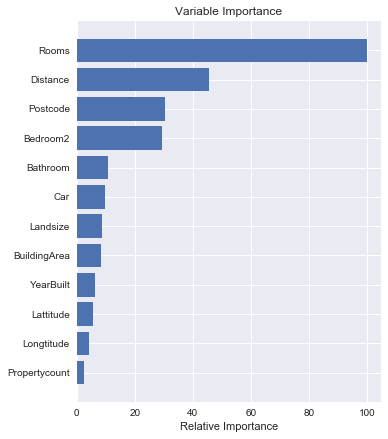

In [25]:
mo=model(ensemble.GradientBoostingRegressor(**params), X, Y)
feature_importance = mo.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
fea_imp=np.array(sorted(list(feature_importance), reverse=True)[0:12])
sorted_idx = np.argsort(fea_imp)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, fea_imp[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

As suggested by the Gradient boost model above are the top 12 features needed for a real estate developer to add value to a house and also predictive of the prices of house.

The Gradient Boost model has the highest accuracy of 81% compared to all other models.